## Netflix Viewing Activity



### A bit information:
This is a sharing account of my friends and me. The data is from December 2020 - February 2021.

### What I will do in this small analysis:
1. See the name of the Profile Names
2. Who spent the most on Netlix
3. What devices used to watch
4. What tv show I watched the most and the duration

#### 1. Profile Names
Since this is a sharing account, let's see who the users are.

In [1]:
import numpy as np
import pandas as pd
watch_data = pd.read_csv('ViewingActivity.csv')
watch_data['Profile Name'].unique()

array(['Jenniekus', 'Lisaginn', 'Roseuna', 'jisokta'], dtype=object)

Since we made our profile into a Blackpink theme. Let me change the name to our usual nickname.


In [2]:
watch_data['Profile Name'].replace({
    'Jenniekus': 'Amik', 
    'Lisaginn': 'Aginia', 
    'Roseuna': 'Una', 
    'jisokta': 'Okta'}, inplace=True)


watch_data['Profile Name'].unique()

array(['Amik', 'Aginia', 'Una', 'Okta'], dtype=object)

In [3]:
print(watch_data.columns)

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')


Beforehand, I cleaned the data (meaning that the columns that I would not be using) such as Attributes, Supplemental Video Type, Bookmark, and Latest Bookmark.

In [4]:
watch_data = watch_data.drop(watch_data.columns[[3,5,7,8]], axis = 1)

#### 2. Who spent the most on Netlix
Let's find out who watches the most on Netflix

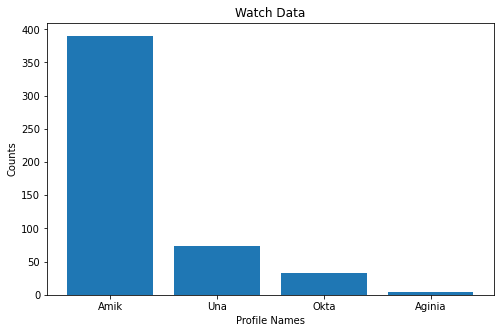

In [5]:
import matplotlib.pyplot as plt

profile_watch_count = watch_data['Profile Name'].value_counts()
plt.figure(figsize = (8,5))
plt.bar(profile_watch_count.index, profile_watch_count.values)
plt.xlabel('Profile Names')
plt.ylabel('Counts')
plt.title('Watch Data')
plt.show()

Turns out Amik spent the most watching on Netflix. As for me, I am in the third place.

Also, I am curious from where country(ies) we watch Netxflix (just in case there is someone who uses VPN)

In [6]:
country = watch_data['Country'].value_counts()
print(country)

ID (Indonesia)    501
Name: Country, dtype: int64


Turns out, none of us bothers to use VPN. All of us watch Netflix from Indonesia.



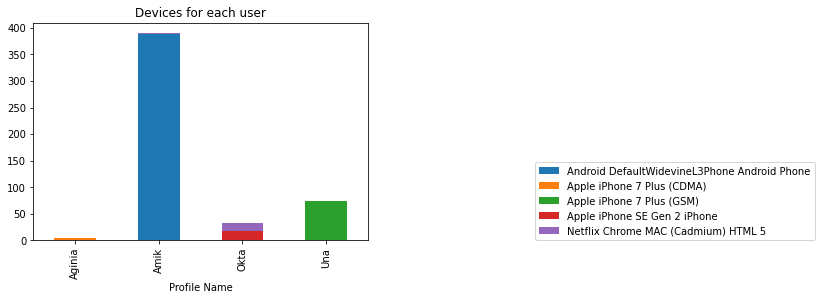

In [7]:
watch_data.groupby(['Profile Name', 'Device Type']).size().unstack().plot(kind = 'bar', stacked= True)


plt.title('Devices for each user')
plt.legend(loc = (1.5,0))

As described in the graph, those are the devices we used to watch Netflix. As for me, I use my phone and my laptop.


#### 4. What tv show I watched the most and the duration
Before doing that, I cleaned the Title so that there will be no the season and the name of the episode.
Going to the next mission, I want to find out what tv show I watched the most. But, first thing first, I need to split the title and the seasons of the tv shows so that it is not counted differently.

In [8]:
c_title = []
for title in watch_data['Title']:
    c_title.append(title.split(":",1)[0])
    


watch_data['Title'] = pd.DataFrame(c_title)

In [9]:
jiso_title = watch_data[(watch_data['Profile Name'] == 'Okta') & (watch_data['Title'])]

from collections import Counter    
count_okta = Counter(jiso_title['Title'])
    # Calling a method of Counter object(count)
count_okta.most_common(1)

[('Behind Her Eyes', 10)]

So, tv show that I watched the most is Behind Her Eyes. 
Then, I want to know how much time I spend watching it.

In [10]:
watch_data['Duration'] = pd.to_timedelta(watch_data['Duration'])
most_watched = watch_data[watch_data['Title'].str.contains('Behind Her', regex=False)]
most_watched = most_watched[(most_watched['Duration'] > '0 days 00:00:10')]
most_watched.sum()

Profile Name                     OktaOktaOktaOktaOktaOktaOktaOkta
Start Time      2021-03-02 10:32:112021-03-02 09:30:052021-03-...
Duration                                          0 days 02:05:36
Title           Behind Her EyesBehind Her EyesBehind Her EyesB...
Device Type     Apple iPhone SE Gen 2 iPhoneApple iPhone SE Ge...
Country         ID (Indonesia)ID (Indonesia)ID (Indonesia)ID (...
dtype: object

So the total amount of time I watch Behind Her Eyes was approximately 2 hours. Well, it seemed not a lot, but it makes sense since between those months I did not watch a lot. (Sometimes I just did not know where to watch so I just ended up looking through the titles on Netflix)